# Importing the dataset

In [2]:
# Import Pandas Library
import pandas as pd

In [3]:
# Importing the dataset into a dataframe to have a structured form
file_path = 'C:\\Users\\USER\\Documents\\PERSONAL\\DATA ANALYTICS\\LEARNING\\PYTHON\PROJECTS\\Banking Cuustomer Churn\\Bank Customer Churn.csv'
df = pd.read_csv(file_path)

In [4]:
# Taking a look at the first 5 rows to understand the structure
print("DataFrame Head (First 5 Rows)")
print(df.head())

DataFrame Head (First 5 Rows)
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


## Exploring The Dataset to learn more about it

In [5]:
# Colunm names
print("Columns:", df.columns.tolist())

# Data types and missing value counts
print("\n Datatypes and null counts:")
print(df.info())

# How Many Missing Values Per Colunm
print("\n Missing Values per Column:")
print(df.isnull().sum())

# Quick stats only for NUmeric Colunms
df.describe()

Columns: ['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']

 Datatypes and null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), objec

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the above dataset summary, it is established that there is a total of 10,000 entries and there are no missing values (non-null) in any of the columns in the dataset.

# Feature Engineering & Preprocessing

The main goal here is to get the data ready for a machine learning model, which only understands numbers.

## Drop Irrelevant Identifiers
There is a need to remove columns that don't help the model to predict churn.

* customer_id: This is a unique identifier. It has no predictive power and must be removed to prevent the model from overfitting to specific IDs.

* churn: This is your target variable, the column we are trying to predict. We need to separate this from the features (X) before training the model, but we won't drop it from the original DataFrame yet.

In [6]:
# Dropping the customer_id column as it's an arbitrary identifier
df = df.drop('customer_id', axis=1)

print(f"New DataFrame shape after dropping ID: {df.shape}")

New DataFrame shape after dropping ID: (10000, 11)


## Encoding Categorical Variables

There are two object (string) columns; country and gender which must be converted into numerical representations.

In [7]:
# Using get_dummies to One-Hot Encode the 'country' and 'gender' columns
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True, dtype=int)

print("\n DataFrame Head after Encoding")
print(df.head())

print("\n DataFrame Information after Encoding")
df.info()


 DataFrame Head after Encoding
   credit_score  age  tenure    balance  products_number  credit_card  \
0           619   42       2       0.00                1            1   
1           608   41       1   83807.86                1            0   
2           502   42       8  159660.80                3            1   
3           699   39       1       0.00                2            0   
4           850   43       2  125510.82                1            1   

   active_member  estimated_salary  churn  country_Germany  country_Spain  \
0              1         101348.88      1                0              0   
1              1         112542.58      0                0              1   
2              0         113931.57      1                0              0   
3              0          93826.63      0                0              0   
4              1          79084.10      0                0              1   

   gender_Male  
0            0  
1            0  
2            0 

# Exploratory Data Analysis (EDA)

The core goal here is to answer the question: "**What is driving customers to churn?**"

* Baseline Churn Rate

The first thing is to calculate the overall percentage of customers who have churned.

In [8]:
total_customers = len(df)
churned_customers = df['churn'].sum() # 'churn' is 1/0, so sum is the count of 1s
churn_rate = (churned_customers / total_customers) * 100

print("🎯 Baseline Churn Analysis")
print(f"Total Customers: {total_customers}")
print(f"Customers Who Churned: {churned_customers}")
print(f"Overall Churn Rate (Baseline): {churn_rate:.2f}%")

🎯 Baseline Churn Analysis
Total Customers: 10000
Customers Who Churned: 2037
Overall Churn Rate (Baseline): 20.37%


* Categorical Churn Drivers

There is a need to see how churn varies by location and gender. To do this cleanly, the original data file will be loaded again (named Bank Customer Churn.csv in this cases) to use the un-encoded text columns.

In [9]:
import pandas as pd

# Reloading the original file is the simplest way to group by text categories
file_path2 = 'C:\\Users\\USER\\Documents\\PERSONAL\\DATA ANALYTICS\\LEARNING\\PYTHON\PROJECTS\\Banking Cuustomer Churn\\Bank Customer Churn.csv'
temp_df = pd.read_csv(file_path2) 

print("\n 🌍 Churn Rate by Country")

# Group by 'Country' and calculate the mean of 'Churn' (which is the churn rate)
country_rate = temp_df.groupby('country')['churn'].mean().sort_values(ascending=False) * 100
print(country_rate.map('{:.2f} %'.format))

print("\n 🚻 Churn Rate by Gender")
gender_rate = temp_df.groupby('gender')['churn'].mean().sort_values(ascending=False) * 100
print(gender_rate.map('{:.2f} %'.format))


 🌍 Churn Rate by Country
country
Germany    32.44 %
Spain      16.67 %
France     16.15 %
Name: churn, dtype: object

 🚻 Churn Rate by Gender
gender
Female    25.07 %
Male      16.46 %
Name: churn, dtype: object


The baseline churn rate for the bank is 20.37% (calculated from the $\frac{2037}{10000}$ in the original data, which is the sum of the churn column divided by the total number of customers). The categorical analysis of customer attrition reveals two critical areas for retention strategy: **Country** and **Gender**.

1. **Geographic Disparity: Germany is the Highest Churn Driver**
The data shows a massive imbalance in churn rates across the three operating regions:

* Germany has an alarmingly high churn rate of 32.44%.

* Spain and France have significantly lower and closely grouped rates (16.67% and 16.15%, respectively).

**Business Implication:** German customers are nearly double the risk of churning compared to French or Spanish customers. The bank must prioritize investigating the German market, focusing on local product fit, marketing, and customer service quality, as this is the single largest area of preventable loss.

2. 🚻 **Gender Bias: Female Customers Churn More Often**
There is a clear difference in attrition based on gender:

* Female customers have a churn rate of 25.07%.

* Male customers have a lower churn rate of 16.46%.

**Business Implication**: Female customers represent a higher flight risk (nearly 50% higher than male customers). Retention strategies, marketing campaigns, and product features should be reviewed to ensure they are adequately addressing the needs and pain points specific to the bank's female customer segment.

* Numerical Churn Drivers (Visualization)

For numerical features like Age and Balance, a visual comparison is best. I'll start with Age, as it's often a major predictor.

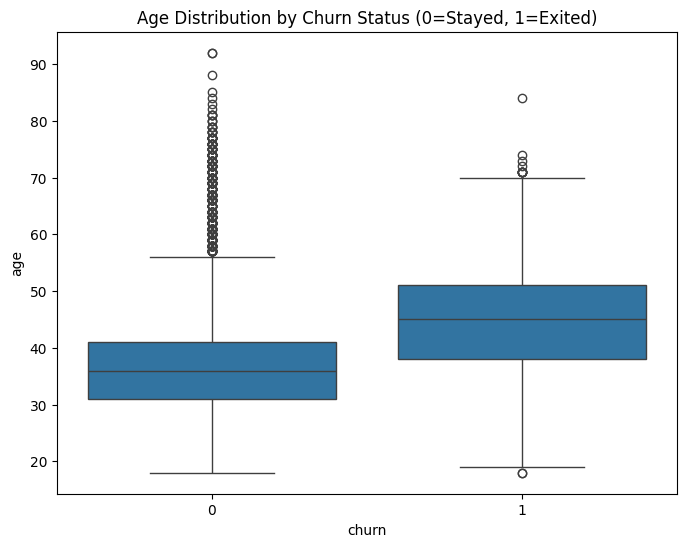

In [11]:
# Importing the visulization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Using the temporary original DataFrame (temp_df)
plt.figure(figsize=(8, 6))

# Box plot shows the distribution (median, quartiles, outliers) of Age for each 'Exited' group
sns.boxplot(x='churn', y='age', data=temp_df)
plt.title('Age Distribution by Churn Status (0=Stayed, 1=Exited)')
plt.show() # Display the chart

**Statistical Interpretation**

* Median Age Shift: The median age (the line inside the box) for customers who stayed is approximately 36 years. In sharp contrast, the median age for customers who churned is about 45 years.

* Higher Risk Group: The entire box (representing the interquartile range, or 50% of the data) for churners is positioned above the median for non-churners. The central 50% of churners are aged between roughly 39 and 51, while the central 50% of non-churners are aged between 32 and 41.

**Business Implication**

This suggests that the bank's services or products are failing to retain their middle-aged and senior customer base. Retention efforts should be heavily focused on customers in the 40–60 age bracket, as they represent the highest age-related flight risk. The bank needs to investigate why its value proposition diminishes for customers as they get older (e.g., are investment products lacking? are retirement planning services inadequate?).

## Modeling Preparation
The preparation phase involves two critical steps: Splitting the data and Scaling the features.


* Data Separation and Splitting

We must separate our data into features ($\mathbf{X}$) and the target ($\mathbf{y}$), and then split them into training and testing sets.

* **Training Set**: Used to teach the model the patterns.
* **Testing Set**: Used to evaluate the model's performance on data it has never seen.

An 80/20 split will be used (80% for training, 20% for testing) and use `stratify=y` to ensure both sets have the same proportion of churned customers (approx. 20.37%).

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define Features (X) and Target (y)
X = df.drop('churn', axis=1) # All columns except 'churn'
y = df['churn']              # The 'churn' column

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,            # 20% of data for testing
    random_state=42,          # For reproducible results
    stratify=y                # Ensures the churn rate is equal in train/test sets
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (8000, 11)
X_test shape: (2000, 11)


* Feature Scaling (Standardization)

Machine learning models, especially those using distance calculations, can be biased by features with large value ranges (e.g. estimated_salary up to 200,000).

Standardization scales all numerical features to have a mean of 0 and a standard deviation of 1.

In [14]:
from sklearn.preprocessing import StandardScaler

# Identify Numerical Features to Scale
# Exclude binary/encoded (0/1) columns: credit_card, active_member, and country/gender dummies
numerical_features = [
    'credit_score', 'age', 'tenure', 'balance', 
    'products_number', 'estimated_salary'
]

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the Training Data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform BOTH Training and Testing Data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Print a preview of the scaled training data (check the 'balance' and 'age' columns)
print("\n X_train Head after Scaling")
print(X_train[numerical_features].head())


 X_train Head after Scaling
      credit_score       age    tenure   balance  products_number  \
2151      1.058568  1.715086  0.684723 -1.226059        -0.910256   
8392      0.913626 -0.659935 -0.696202  0.413288        -0.910256   
5006      1.079274 -0.184931 -1.731895  0.601687         0.808830   
4117     -0.929207 -0.184931 -0.005739 -1.226059         0.808830   
7182      0.427035  0.955079  0.339492  0.548318         0.808830   

      estimated_salary  
2151          1.042084  
8392         -0.623556  
5006          0.308128  
4117         -0.290199  
7182          0.135042  


## Model Training
For this project, starting with a simple yet interpretable model like Logistic Regression is the standard approach. It provides a good baseline and the coefficients can be interpreted as risk factors.

* Train the Logistic Regression Model

I'll use `scikit-learn's` `LogisticRegression` class.

In [15]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
log_model = LogisticRegression(random_state=42)

# Train the model using the scaled training data
# This is where the model "learns" the relationship between X_train and y_train
log_model.fit(X_train, y_train)

# Make predictions on the test set
# This generates the predicted churn status (0 or 1) for the unseen data
y_pred = log_model.predict(X_test)

# Evaluate Model Performance

Since the data is imbalanced (only $\approx 20\%$ churners), we can't just rely on Accuracy. There is need for specific metrics like **Precision**, **Recall**, and the **F1-Score**.

* **Precision**: Out of all customers the model predicted would churn, how many actually did? (Important for marketing campaigns to save money). 

* **Recall**: Out of all customers who actually churned, how many did the model correctly identify? (Important for catching all high-risk customers). 

* **ROC AUC Score**: The primary metric for classification problems, representing the model's ability to distinguish between the two classes.

In [16]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Generate the classification report
print("\n Model Classification Report")
print(classification_report(y_test, y_pred))

# Calculate the ROC AUC Score (the gold standard for this type of problem)
# Use predict_proba to get probability scores, which are required for AUC
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n ROC AUC Score: {roc_auc:.4f}")

# Print the Confusion Matrix (visualizes the correct/incorrect predictions)
print("\n Confusion Matrix (Actual vs. Predicted)")
print(confusion_matrix(y_test, y_pred))


 Model Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


 ROC AUC Score: 0.7748

 Confusion Matrix (Actual vs. Predicted)
[[1540   53]
 [ 331   76]]


**Interpretation for the Business Team**

The model performs well on the majority class (non-churners, class 0), but it's currently poor at identifying the high-value target: **the actual churners (class 1)**.

* **High Accuracy is Misleading**: An 81% accuracy sounds great, but since $79.65\%$ of the customers didn't churn (1593 out of 2000), a model that always guessed "0" (Stayed) would achieve nearly 80% accuracy! The model needs to prove its worth by finding the difficult-to-predict churners. 

* **Low Recall (18.67%)**: This is the main weakness. The bank is missing over $81\%$ of the customers who are about to leave. If the goal is to save high-risk customers, this model isn't effective yet.Decent AUC (0.77): The $0.77$ AUC shows the model is definitely learning something meaningful, but we need to tune it to prioritize Recall.

* Feature Importance



In [17]:
import numpy as np

# Create a DataFrame to hold the feature names and their coefficients
# log_model.coef_[0] contains the coefficients for the binary outcome (churn=1)
feature_importance = pd.DataFrame({
    'Feature': X.columns, 
    'Coefficient': log_model.coef_[0]
})

# Sort the features by the absolute value of their coefficient magnitude
feature_importance['Magnitude'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Magnitude', ascending=False)

print("\n Top 10 Feature Importance (Coefficients)")
print(feature_importance.head(10))


 Top 10 Feature Importance (Coefficients)
             Feature  Coefficient  Magnitude
6      active_member    -1.028157   1.028157
8    country_Germany     0.819585   0.819585
1                age     0.738453   0.738453
10       gender_Male    -0.523155   0.523155
3            balance     0.161093   0.161093
0       credit_score    -0.085893   0.085893
5        credit_card    -0.070516   0.070516
4    products_number    -0.070423   0.070423
7   estimated_salary     0.047666   0.047666
9      country_Spain     0.042508   0.042508


## 🔑 Final Summary: Feature Importance & Recommendations

**Consolidated Business Recommendations**
Based on the overall project (EDA + Feature Importance), here are the top three strategic actions for the bank:

1. **Immediate Retention Target: Inactive Customers (Rank 1)**:

* **Action**: Launch a dedicated "Re-Engagement Campaign" targeting customers with active_member = 0. Since this is the strongest deterrent to churn, reactivating accounts will yield the highest immediate return on investment.

2. **Product & Service Review: Germany (Rank 2)**:

* **Action**: Initiate a deep-dive investigation into the German branch's customer experience and product suite. The localized issue is not random; it suggests a specific failure in regional product fit, pricing, or local competition.

3. **Strategic Focus: Aging & Gender (Ranks 3 & 4)**:

* **Action**: Develop specific loyalty programs tailored for Female customers and customers aged 40+. The bank is failing to retain these valuable segments.